# Pymaceuticals - by Caroline Miller
# MAKE SURE YOU SAVE GRAPH
### 1. 
### 2. 
### 3. 

In [37]:
%matplotlib notebook

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [39]:
#import the two datasets
clinicaltrial = pd.read_csv('clinicaltrial_data.csv')
mousedata = pd.read_csv('mouse_drug_data.csv')

#left join two datasets on Mouse ID
clinical_mouse = pd.merge(clinicaltrial, mousedata, on = 'Mouse ID', how = 'left')
clinical_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [5]:
#Groupby function to find the averages based on Drug and Timepoint
drug_timepoint = clinical_mouse.groupby(['Drug','Timepoint'])

#find the mean
mean_vol = drug_timepoint['Tumor Volume (mm3)'].mean()

#save in a dataframe
mean_vol_df = pd.DataFrame({"Mean Volume": mean_vol}).reset_index()
mean_vol_df.head()

,Drug,Timepoint,Mean Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
#Find the standard error for the volume variable based on drug and timepoint
sem_vol = drug_timepoint['Tumor Volume (mm3)'].sem()

#convert standard error into a dataframe
sem_vol_df = pd.DataFrame({"Standard Error": sem_vol}).reset_index()
sem_vol_df.head()

,Drug,Timepoint,Standard Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
#Restructure the dataframe so the drug names are the columns. This is done with "colums"
mean_vol_df_restructured = mean_vol_df.pivot_table(index='Timepoint', columns='Drug')

#print the first five values 
mean_vol_df_restructured.head()

Mean Volume                                                         \
Drug        Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo   
Timepoint                                                                      
0           45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5           44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10          43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15          42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20          40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

                                                       
Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334

In [8]:
#Making new dataframes to call for making the plots

#Capomulin error and mean
cap_error = sem_vol_df[sem_vol_df['Drug'] == 'Capomulin']
cap_mean = mean_vol_df[mean_vol_df['Drug'] == 'Capomulin']

#Infubinol error and mean
inf_error = sem_vol_df[sem_vol_df['Drug'] == 'Infubinol']
inf_mean = mean_vol_df[mean_vol_df['Drug'] == 'Infubinol']

#Ketapril error and mean
ket_error = sem_vol_df[sem_vol_df['Drug'] == 'Ketapril']
ket_mean = mean_vol_df[mean_vol_df['Drug'] == 'Ketapril']

#Placebo error and mean
pla_error = sem_vol_df[sem_vol_df['Drug'] == 'Placebo']
pla_mean = mean_vol_df[mean_vol_df['Drug'] == 'Placebo']
cap_error

,Drug,Timepoint,Standard Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [28]:
#Make the graph
#need to add error bars still

x_axis = np.arange(0, 50, 5)
plt.ylim(20, 80)
plt.xlim(0, 45)

#create handles for the 4 lines including their styles and labels. 

#Capomulin
plt.errorbar(x_axis, cap_mean['Mean Volume'], yerr = cap_error['Standard Error'], color = 'red', marker = '.', label = "Capomulin")

#Infubinol
plt.errorbar(x_axis, inf_mean['Mean Volume'], yerr = inf_error['Standard Error'], color = 'blue', marker = '^', label = "Infubinol")

#Ketapril
plt.errorbar(x_axis, ket_mean['Mean Volume'], yerr = ket_error['Standard Error'], color = 'green', marker = 's', label = "Ketapril")

#Placebo
plt.errorbar(x_axis, pla_mean['Mean Volume'], yerr = pla_error['Standard Error'], color = 'black', marker = 'd', label = "Placebo")

plt.legend(loc = 'upper left')

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

#display the chart
plt.show()

#remember to save the visual
plt.savefig("../matbplotlibhw/'Tumor_Response'.png")

FileNotFoundError: [Errno 2] No such file or directory: "../matbplotlibhw/'Tumor_Response'.png"

## Metastatic Response to Treatment

In [21]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic = drug_timepoint['Metastatic Sites'].mean()

# Convert to DataFrame
metastatic_df = pd.DataFrame({"Mean Metastatic Site": mean_metastatic}).reset_index()

# Preview DataFrame
metastatic_df.head()

,Drug,Timepoint,Mean Metastatic Site
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [22]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metastatic = drug_timepoint['Metastatic Sites'].sem()

# Convert to DataFrame. Reset_index makes the formatting cleaner.
metastatic_sem_df = pd.DataFrame({"Standard Error": sem_metastatic}).reset_index()

# Preview DataFrame
metastatic_sem_df.head()

,Drug,Timepoint,Standard Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [23]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_vol_df_restructured = metastatic_df.pivot_table(index='Timepoint', columns='Drug')

# Preview that Reformatting worked
metastatic_vol_df_restructured.head()

Mean Metastatic Site                                          \
Drug                 Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                                
0                     0.000000  0.000000  0.000000  0.000000  0.000000   
5                     0.160000  0.380952  0.280000  0.304348  0.260870   
10                    0.320000  0.600000  0.666667  0.590909  0.523810   
15                    0.375000  0.789474  0.904762  0.842105  0.857143   
20                    0.652174  1.111111  1.050000  1.210526  1.150000   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.375000  0.320000  0.120000  0.240000  0.166667  
10         0.833333  0.565217  0.250000  0.478261  0.500000  
15         1.250000  0.764706  0.333333  0.782609  0.809524  
20         1.526316  1.000000  0.347826  0.952381  1.294118

In [24]:
#Making new dataframes to call for making the plots

#Capomulin error and mean
cap_error2 = metastatic_sem_df[metastatic_sem_df['Drug'] == 'Capomulin']
cap_mean2 = metastatic_df[metastatic_df['Drug'] == 'Capomulin']

#Infubinol error and mean
inf_error2 = metastatic_sem_df[metastatic_sem_df['Drug'] == 'Infubinol']
inf_mean2 = metastatic_df[metastatic_df['Drug'] == 'Infubinol']

#Ketapril error and mean
ket_error2 = metastatic_sem_df[metastatic_sem_df['Drug'] == 'Ketapril']
ket_mean2 = metastatic_df[metastatic_df['Drug'] == 'Ketapril']

#Placebo error and mean
pla_error2 = metastatic_sem_df[metastatic_sem_df['Drug'] == 'Placebo']
pla_mean2 = metastatic_df[metastatic_df['Drug'] == 'Placebo']

<IPython.core.display.Javascript object>


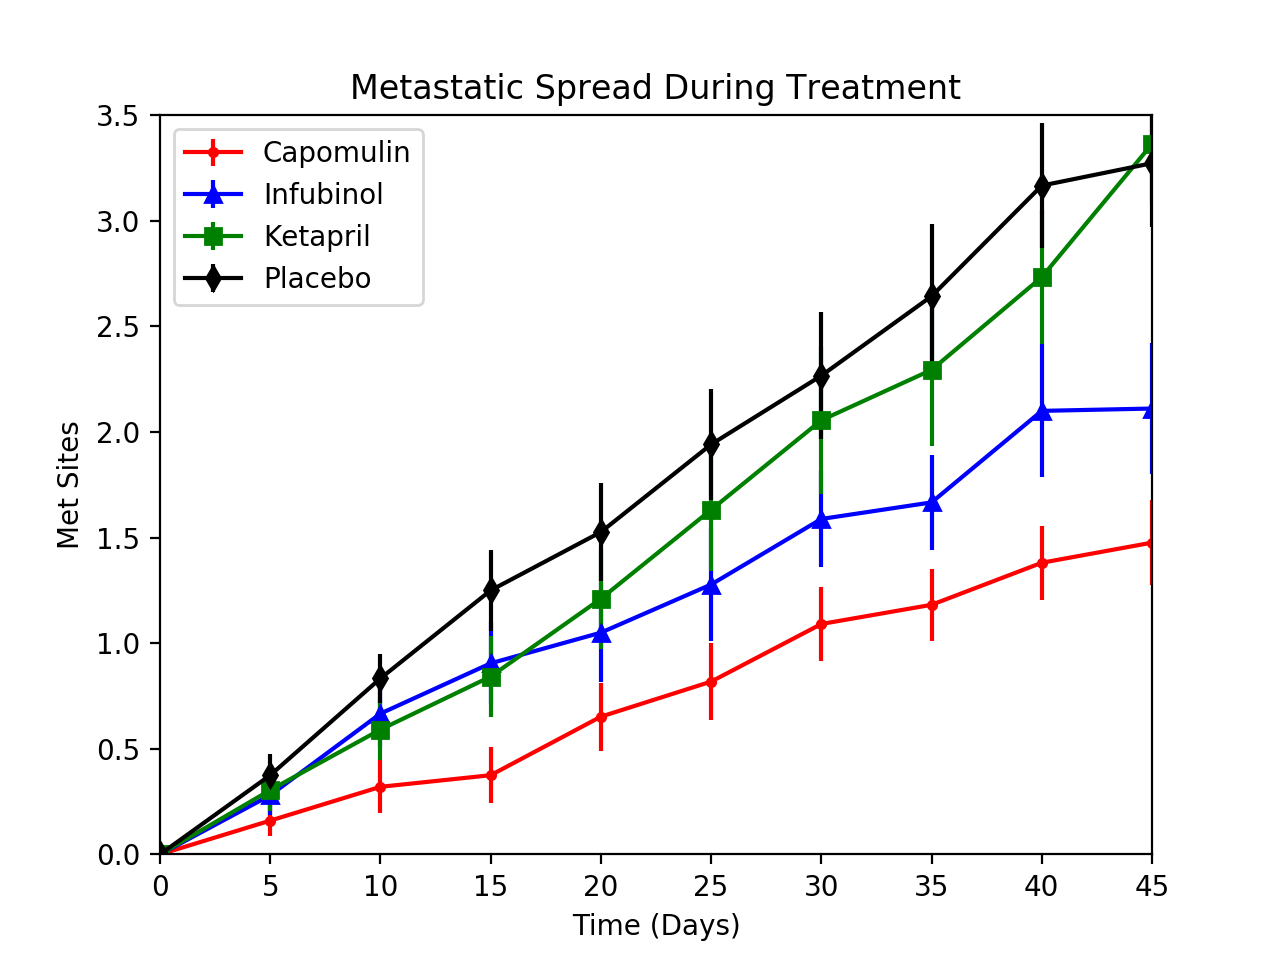

In [27]:
#create handles for the 4 lines including their styles and labels. 
x_axis = np.arange(0, 50, 5)
plt.ylim(0, 3.5)
plt.xlim(0, 45)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Met Sites")

#Capomulin
plt.errorbar(x_axis, cap_mean2['Mean Metastatic Site'], yerr = cap_error2['Standard Error'], color = 'red', marker = '.', label = "Capomulin")

#Infubinol
plt.errorbar(x_axis, inf_mean2['Mean Metastatic Site'], yerr = inf_error2['Standard Error'], color = 'blue', marker = '^', label = "Infubinol")

#Ketapril
plt.errorbar(x_axis, ket_mean2['Mean Metastatic Site'], yerr = ket_error2['Standard Error'], color = 'green', marker = 's', label = "Ketapril")

#Placebo
plt.errorbar(x_axis, pla_mean2['Mean Metastatic Site'], yerr = pla_error2['Standard Error'], color = 'black', marker = 'd', label = "Placebo")

plt.legend(loc = 'upper left')


#display the chart
plt.show()

#remember to save the visual
plt.savefig("../matplotlibhw/'Metastatic_Response'.png")

## Survival Rates

In [40]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = drug_timepoint['Mouse ID'].count()

# Convert to DataFrame
mouse_count_df = pd.DataFrame({"Mouse Count": mouse_count}).reset_index()

# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [41]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_restructured = mouse_count_df.pivot_table(index='Timepoint', columns='Drug')

# Preview the Data Frame
mouse_count_restructured.head()

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

In [42]:
#Making new dataframes to call for making the plots

#Capomulin error and mean
cap_count = mouse_count_df[mouse_count_df['Drug'] == 'Capomulin']

#Infubinol error and mean
inf_count = mouse_count_df[mouse_count_df['Drug'] == 'Infubinol']

#Ketapril error and mean
ket_count = mouse_count_df[mouse_count_df['Drug'] == 'Ketapril']

#Placebo error and mean
pla_count = mouse_count_df[mouse_count_df['Drug'] == 'Placebo']

<IPython.core.display.Javascript object>


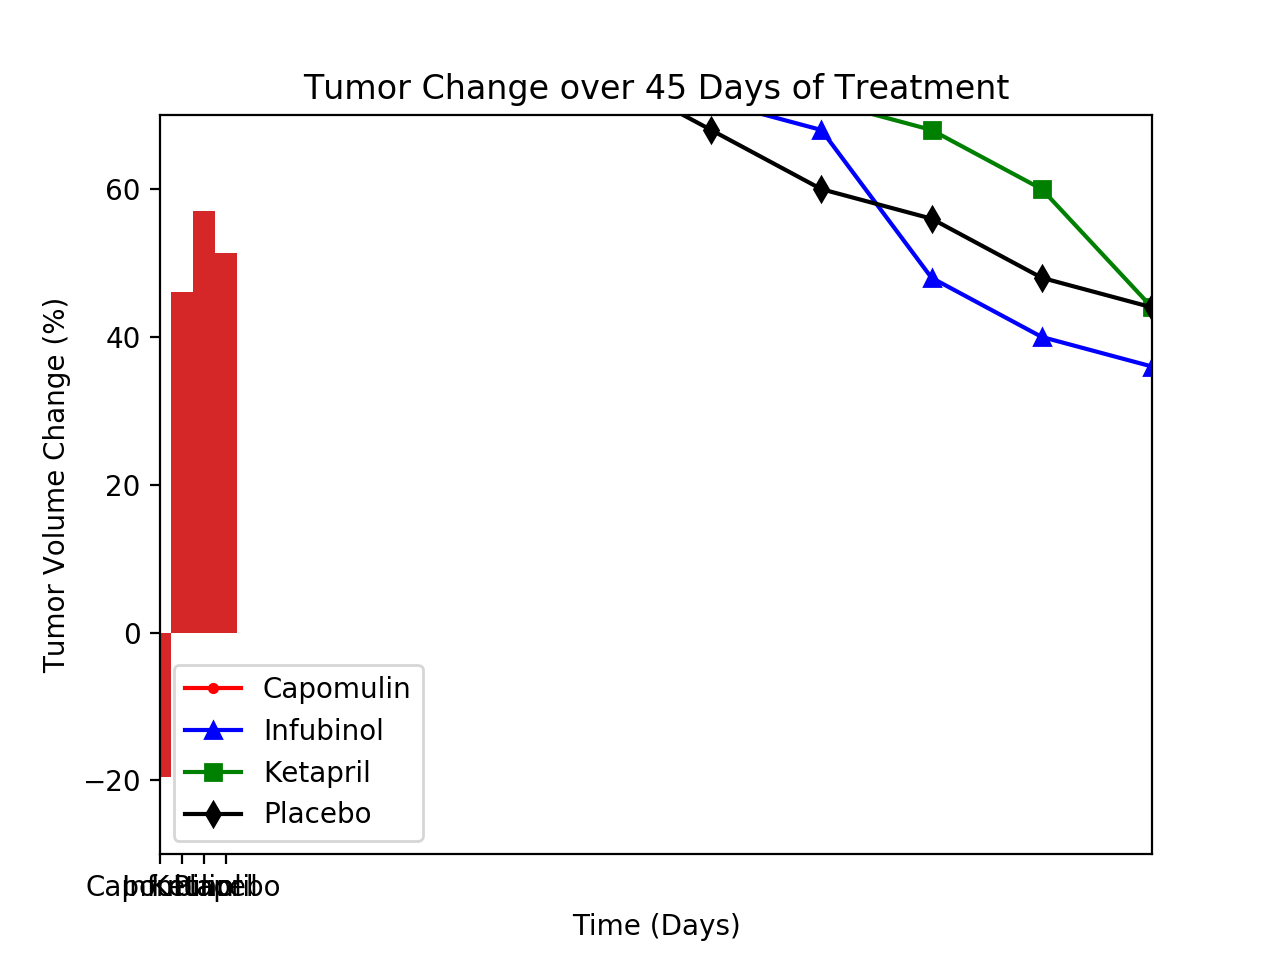

In [44]:
#create handles for the 4 lines including their styles and labels. 
x_axis = np.arange(0, 50, 5)
plt.ylim(0, 100)
plt.xlim(0, 45)

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

#Capomulin
capomulin3, = plt.plot(x_axis, (cap_count['Mouse Count']/25)*100, color = 'red', marker = '.', label = "Capomulin")

#Infubinol
infubinol3, = plt.plot(x_axis, (inf_count['Mouse Count']/25)*100, color = 'blue', marker = '^', label = "Infubinol")

#Ketapril
ketapril3, = plt.plot(x_axis, (ket_count['Mouse Count']/25)*100, color = 'green', marker = 's', label = "Ketapril")

#Placebo
placebo3, = plt.plot(x_axis, (pla_count['Mouse Count']/25)*100, color = 'black', marker = 'd', label = "Placebo")

plt.legend(handles = [capomulin3, infubinol3, ketapril3, placebo3], loc = 'lower left')


#display the chart
plt.show()

#remember to save the visual
plt.savefig("../matplotlibhw/'Survival_Treatment'.png")

## Summary Bar Graph

In [108]:
# Calculate the percent changes for each drug
# revisit the mean_vol_df_restructured table since it already has mean volumes for each drug based on time
# Store all Relevant Percent Changes into a Tuple

pct_change_vol =((mean_vol_df_restructured.iloc[9,:]-mean_vol_df_restructured.iloc[0,:])
*100/mean_vol_df_restructured.iloc[0,:])


pct_change_vol

             Drug     
Mean Volume  Capomulin   -19.475303
             Ceftamin     42.516492
             Infubinol    46.123472
             Ketapril     57.028795
             Naftisol     53.923347
             Placebo      51.297960
             Propriva     47.241175
             Ramicane    -22.320900
             Stelasyn     52.085134
             Zoniferol    46.579751
dtype: float64

In [109]:
cap_pct_change = pct_change_vol['Mean Volume']['Capomulin']
inf_pct_change = pct_change_vol['Mean Volume']['Infubinol']
ket_pct_change = pct_change_vol['Mean Volume']['Ketapril']
pla_pct_change = pct_change_vol['Mean Volume']['Placebo']

bar_graph_vars = pd.DataFrame({"Drug": ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],
                                 "Percent Change": [cap_pct_change, inf_pct_change, ket_pct_change, pla_pct_change]})

bar_graph_vars

,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


In [113]:
#bar graph here
plt.bar(bar_graph_vars['Drug'], bar_graph_vars['Percent Change'], width = -1)

plt.grid()
plt.ylim(-30,70)
plt.ylabel('Tumor Volume Change (%)')
plt.title('Tumor Change over 45 Days of Treatment')
plt.show()

In [ ]:
#Graph Stuff

# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()